In [1]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os
import scipy.stats as stats 
import re

In [2]:
path = "./indiv_files"
all_names = os.listdir(path)

In [3]:
# groups:
# 1 is control
# 2 is placebo
# 3 is coffee

s1, s2, s3 = [], [], []

for file_name in all_names:
    if file_name.endswith("3.tsv"):
        f3 = pd.read_csv(file_name, sep='\t', header = 0, low_memory=False)
        s3.append(f3)
    elif file_name.endswith("2.tsv"):
        f2 = pd.read_csv(file_name, sep='\t', header = 0, low_memory=False)
        s2.append(f2)
    elif file_name.endswith("1.tsv"):
        f1 = pd.read_csv(file_name, sep='\t', header = 0, low_memory=False)
        s1.append(f1)
    else:
        print("wrong file name", file_name) 

In [4]:
df1 = pd.concat(s1)
df2 = pd.concat(s2)
df3 = pd.concat(s3)

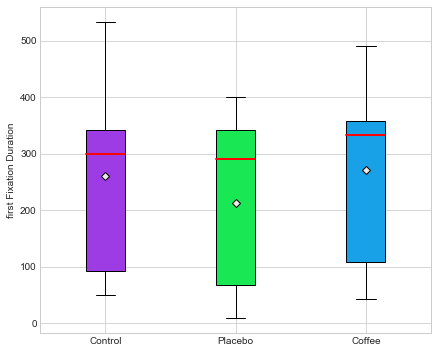

In [6]:
#First Fixation Duration per subject

data1 = []

for df in [df1, df2, df3]:
    mask1 = df['FixationIndex'] == 1
    mask2 = df['GazeEventType'] == 'Fixation'
    df_ = df[mask1 & mask2][['ParticipantName','GazeEventDuration']]
    dfp = df_.groupby(by=df_.ParticipantName, as_index=False).mean()
    data1.append(list(dfp['GazeEventDuration']))
    
style.use('seaborn-whitegrid')
median = dict(linestyle='-', linewidth=2, color='r')
labels = ['Control', 'Placebo', 'Coffee']
meanp = dict(marker='D', markeredgecolor='black', markerfacecolor='#EDECE9')
plt.subplots(figsize=(7,6))

box = plt.boxplot(data1, labels=labels, patch_artist=True, medianprops=median, showmeans=True, meanprops=meanp, showfliers=False)

colors = ['#9D3CE4', '#19E753', '#19A1E7']
for patch, color in zip(box['boxes'], colors):
     patch.set_facecolor(color)    

plt.ylabel('first Fixation Duration');

In [7]:
pd.DataFrame(data1[0]).describe()

,0
count,13.000000
mean,260.615385
std,145.940935
min,50.000000
25%,92.000000
50%,300.000000
75%,341.000000
max,533.000000


In [8]:
pd.DataFrame(data1[1]).describe()

,0
count,13.000000
mean,213.230769
std,156.983096
min,8.000000
25%,67.000000
50%,291.000000
75%,341.000000
max,400.000000


In [9]:
pd.DataFrame(data1[2]).describe()

,0
count,13.000000
mean,270.846154
std,151.070539
min,42.000000
25%,108.000000
50%,333.000000
75%,358.000000
max,491.000000


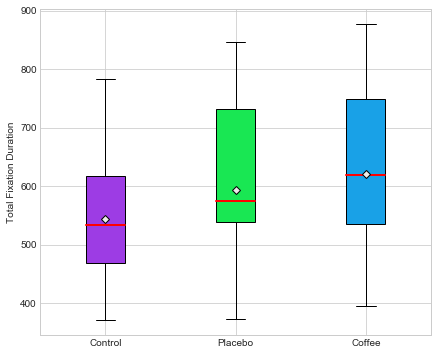

In [10]:
#Total Fixation Duration per subject 

data2 = [] 

for df in [df1, df2, df3]:
    mask = df['GazeEventType'] == 'Fixation'
    df_ = df[mask][['ParticipantName','GazeEventDuration']]
    dfp = df_.groupby(by=df_.ParticipantName, as_index=False).mean()
    data2.append(list(dfp['GazeEventDuration']))

labels = ['Control', 'Placebo', 'Coffee']
median = dict(linestyle='-', linewidth=2, color='r')
meanp = dict(marker='D', markeredgecolor='black', markerfacecolor='#EDECE9')
plt.subplots(figsize=(7,6))

box = plt.boxplot(data2, labels=labels, patch_artist=True, medianprops=median, showmeans=True, meanprops=meanp, showfliers=False)

colors = ['#9D3CE4', '#19E753', '#19A1E7']
for patch, color in zip(box['boxes'], colors):
     patch.set_facecolor(color)    

plt.ylabel('Total Fixation Duration');

In [11]:
pd.DataFrame(data2[0]).describe()

,0
count,13.000000
mean,543.963140
std,117.222634
min,370.239695
25%,468.612361
50%,533.827312
75%,616.911213
max,782.370464


In [12]:
pd.DataFrame(data2[1]).describe()

,0
count,13.000000
mean,593.351130
std,149.252389
min,372.952262
25%,538.419142
50%,574.302827
75%,731.132054
max,846.212457


In [13]:
pd.DataFrame(data2[2]).describe()

,0
count,13.000000
mean,621.249597
std,158.657290
min,394.328672
25%,535.335581
50%,619.504543
75%,749.711334
max,877.203418


In [14]:
#Hypothesis test 

#data1 is first fixation duration 
#data2 is total fixation duration
 
F1, p1 = stats.kruskal(data1[0], data1[1], data1[2])
F2, p2 = stats.kruskal(data2[0], data2[1], data2[2])

print('First Fixation Duration: F: %0.3f p-value: %0.3f' % (F1, p1))
print('Total Fixation Duration: F: %0.3f p-value: %0.3f' % (F2, p2))

First Fixation Duration: F: 0.848 p-value: 0.654
Total Fixation Duration: F: 2.220 p-value: 0.330


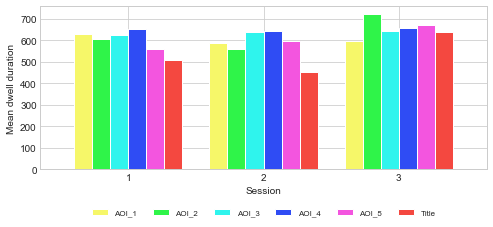

In [15]:
#Dwell time by session

AOI_name = ['AOI[1]Hit','AOI[2]Hit','AOI[3]Hit','AOI[4]Hit','AOI[5]Hit','AOI[Title]Hit']
sess_ = []
number_dwell = []

for df in [df1,df2,df3]:
    dwell = []
    for k in range(6):
        mask1 = df[AOI_name[k]]==1
        a = df[mask1][['ParticipantName','GazeEventDuration']]
        b = df[mask1][['ParticipantName','FixationIndex']]
        dfp = a.groupby(by=a.ParticipantName, as_index=False).mean()
        dfp2 = b.groupby(by=b.ParticipantName, as_index=False).nunique()
        dwell.append(dfp['GazeEventDuration'].mean())
        number_dwell.append(dfp2['FixationIndex'].mean())
    sess_.append(dwell)

labels= ['1','2','3']
colors = ['#F6F769','#2FF449','#2FF4ED','#2F4CF4','#F355DF','#F44840']
session_dwell = pd.DataFrame(sess_)
session_dwell.columns = ['AOI_1', 'AOI_2','AOI_3','AOI_4','AOI_5','Title']
ax = session_dwell.plot(kind='bar', figsize=(8, 3), width=0.8, color=colors, edgecolor='white')
ax.set_xlabel("Session")
ax.set_xticklabels(labels, rotation=360)
ax.set_ylabel("Mean dwell duration")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=6, fontsize=8);

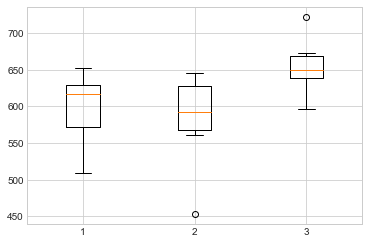

In [16]:
plt.boxplot(sess_);

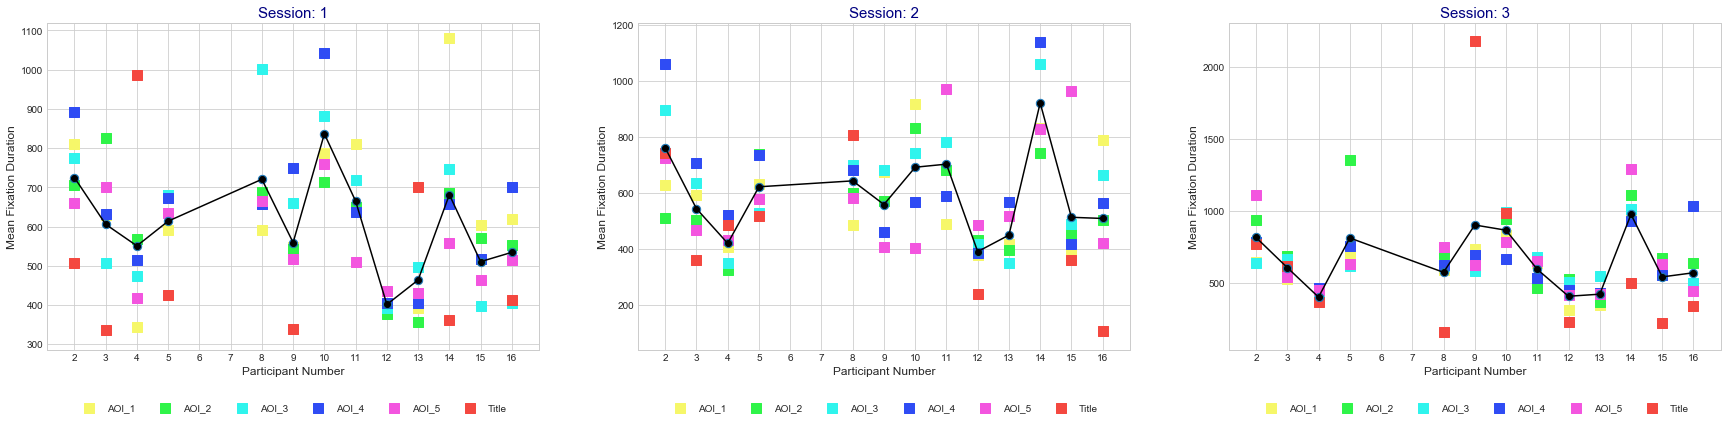

In [17]:
# Dwell time by participant

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(30, 6)

AOI_name = ['AOI[1]Hit','AOI[2]Hit','AOI[3]Hit','AOI[4]Hit','AOI[5]Hit','AOI[Title]Hit']
labels= ['1','2','3']
colors = ['#F6F769','#2FF449','#2FF4ED','#2F4CF4','#F355DF','#F44840']
l = ['AOI_1', 'AOI_2','AOI_3','AOI_4','AOI_5','Title']
x = list(range(0, 17))
i = 0

for df in [df1,df2,df3]:
    i +=1
    dwell = []
    for k in range(6):
        mask1 = df['GazeEventType'] == 'Fixation'
        mask2 = df[AOI_name[k]]==1
        a = df[mask1 & mask2][['ParticipantName','GazeEventDuration']]   
        dfp = a.groupby(by=a.ParticipantName, as_index=False).mean()
        dfp['ParticipantName'] = [re.findall(r'\d+',s)[0] for s in dfp['ParticipantName']]
        dwell.append(dfp)
        
        plt.subplot(1, 3, i)
        plt.scatter(dfp['ParticipantName'], dfp['GazeEventDuration'], facecolor=colors[k], label=l[k], marker='s', s=90)
        plt.ylabel('Mean Fixation Duration', fontsize=12)
        plt.xlabel('Participant Number', fontsize=12)
        plt.xticks(x)
        plt.title("Session: %i" % i, fontsize=15, color='navy')
        plt.legend(loc='center', ncol=6, bbox_to_anchor=(0.5, -0.18), fontsize=10)

    a2 = pd.concat(dwell)
    by_row = a2.groupby(by=a2.ParticipantName, as_index=False).mean()
    by_row['ParticipantName'] = pd.to_numeric(by_row['ParticipantName'])
    a3 = by_row.sort_values(by=['ParticipantName'])
    plt.scatter(a3['ParticipantName'], a3['GazeEventDuration'], s=70, zorder=1)
    plt.plot(a3['ParticipantName'], a3['GazeEventDuration'],'-o', color='black', zorder=2)

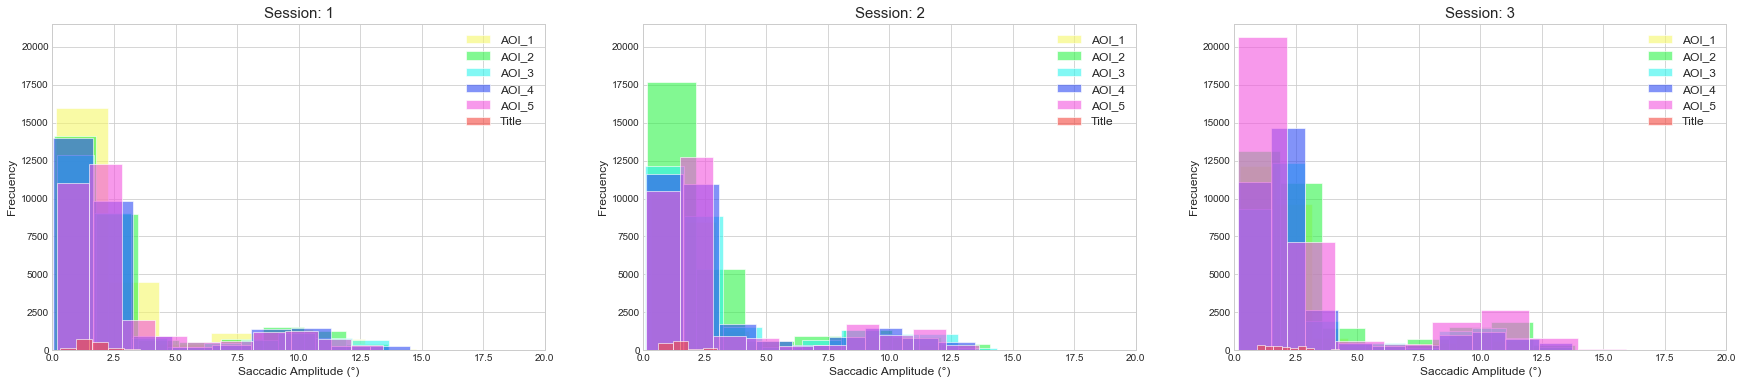

In [18]:
#AOIs Saccadic amplitude frequency by session

AOI_name = ['AOI[1]Hit','AOI[2]Hit','AOI[3]Hit','AOI[4]Hit','AOI[5]Hit','AOI[Title]Hit']
l = ['AOI_1', 'AOI_2','AOI_3','AOI_4','AOI_5','Title']
colors = ['#F6F769','#2FF449','#2FF4ED','#2F4CF4','#F355DF','#F44840']
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(30, 6)

i = 0
sacc_amp = []
for df in [df1,df2,df3]:
    i+=1
    sacc_aois = []
    for k in range(6):
        mask = df[AOI_name[k]]==1
        a = df[mask]['SaccadicAmplitude']
        x = [float(i.replace(',','.')) for i in a]
        plt.subplot(1, 3, i) 
        plt.hist(x, facecolor=colors[k], label=l[k], edgecolor='white', alpha=0.6)
        plt.xlabel('Saccadic Amplitude (°)', fontsize=12)
        plt.ylabel('Frecuency', fontsize=12)
        plt.legend(loc='upper right', fontsize=12)
        plt.title("Session: %i" % i, fontsize=15)
        plt.ylim([0,21500])
        plt.xlim([0,20])
        sacc_aois.append(np.mean(x))
    sacc_amp.append(sacc_aois)

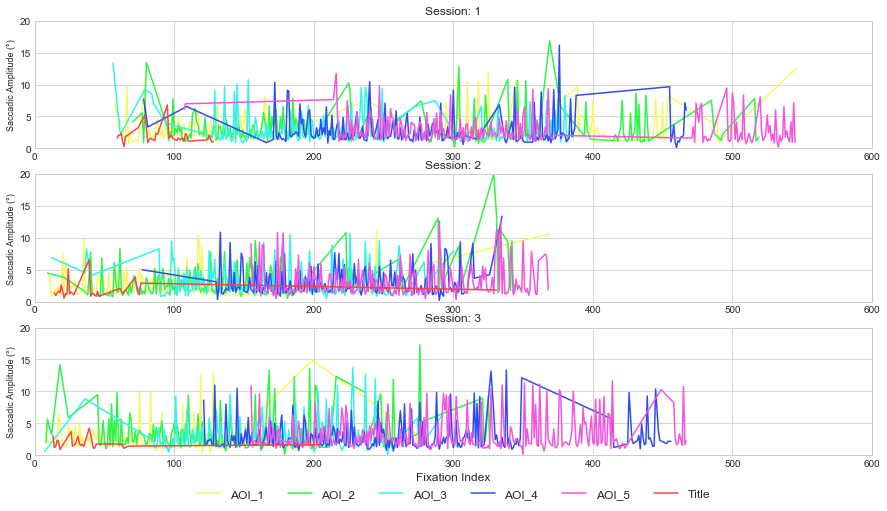

In [19]:
#AOIs Saccadic amplitude by session

AOI_name = ['AOI[1]Hit','AOI[2]Hit','AOI[3]Hit','AOI[4]Hit','AOI[5]Hit','AOI[Title]Hit']
l = ['AOI_1', 'AOI_2','AOI_3','AOI_4','AOI_5','Title']
colors = ['#F6F769','#2FF449','#2FF4ED','#2F4CF4','#F355DF','#F44840']

fig, axes = plt.subplots(3, 1)
fig.set_size_inches(15, 8)

i = 0
for df in [df1,df2,df3]:
    i+=1
    for k in range(6):
        mask = df[AOI_name[k]]==1
        a = df[mask][['FixationIndex','SaccadicAmplitude']]
        a['SaccadicAmplitude'].replace(",", ".", inplace=True, regex=True)
        a['SaccadicAmplitude'] = pd.to_numeric(a['SaccadicAmplitude'])
        dfp = a.groupby(by=a.FixationIndex, as_index=False).mean()
        plt.subplot(3, 1, i)
        plt.plot(dfp['FixationIndex'], dfp['SaccadicAmplitude'], color=colors[k], label=l[k])
        plt.title("Session: %i" % i, fontsize=12)
        plt.ylabel('Saccadic Amplitude (°)', fontsize=9)
        plt.xlim([0,600])
        plt.ylim([0,20])
plt.xlabel('Fixation Index', fontsize=12)
plt.legend(loc='center', fontsize=12,bbox_to_anchor=(0.5, -0.3), ncol=6);

In [33]:
# Proportion dwell 

#Total time per session
total = []

for df in [df1, df2, df3]:
    dfp = df.groupby(by=df.GazeEventDuration, as_index=False).sum()
    total.append(dfp['GazeEventDuration'].mean())
    
#Proportion
pro = session_dwell.copy()
number_dwell = [round(i) for i in number_dwell]
k = 0

for i in range(3):
    for k in range(6):
        pro.loc[i][k] = ((session_dwell.loc[i][k]*number_dwell[k])/ total[i])

In [34]:
#Test Hyphotesis for Percentage dwell time

pro2 = pro.T
F, p = stats.stats.kruskal(pro2[0], pro2[1], pro2[2])
print('Proportion dwell: F: %0.3f p-value: %0.3f' % (F, p))

Proportion dwell: F: 2.608 p-value: 0.271


In [35]:
#Test Hypothesis per percentage dwell time (Wilcoxon: non-parametric version of the paired T-test)

z1, p_value1 = stats.wilcoxon(pro2[0], pro2[1])
z2, p_value2 = stats.wilcoxon(pro2[0], pro2[2])
z3, p_value3 = stats.wilcoxon(pro2[1], pro2[2])
print("control and placebo: z: %0.3f p: %0.3f" % (z1, p_value1))
print("control and coffee: z: %0.3f p: %0.3f" % (z2, p_value2))
print("placebo and coffee: z: %0.3f p: %0.3f" % (z3, p_value3))

control and placebo: z: 0.000 p: 0.028
control and coffee: z: 6.000 p: 0.345
placebo and coffee: z: 0.000 p: 0.028


C:\Users\Adri\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


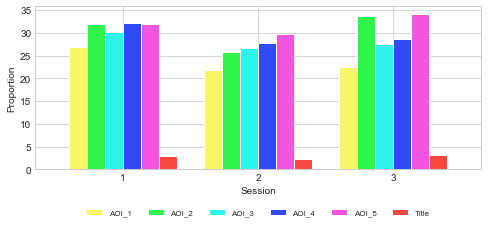

In [36]:
#Percentage dwell time plot

labels= ['1','2','3']
colors = ['#F6F769','#2FF449','#2FF4ED','#2F4CF4','#F355DF','#F44840']
pro.columns = ['AOI_1', 'AOI_2','AOI_3','AOI_4','AOI_5','Title']
ax = pro.plot(kind='bar', figsize=(8, 3), width=0.8, color=colors, edgecolor='white')
ax.set_xlabel("Session")
ax.set_xticklabels(labels, rotation=360)
ax.set_ylabel("Proportion")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=6, fontsize=8);